## Домашнее задание

Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опциционально)сравнить с точностью полносвязной сети для этой выборки
    </li>

Вариант 2. (сложный)
- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.
- оценить рост точности при увеличении глубины сети (больше слоев)
    </li>
</ol>

In [1]:
from __future__ import print_function
import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.regularizers import l2

import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# установка параметров нейросети
batch_size = 25
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']
data_augmentation = False


In [3]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

170508288/170498071 [==============================] - 35s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

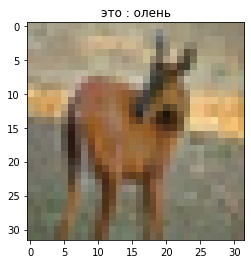

In [5]:
N = 36

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

### Эталонная сеть с большим количеством ядер и сверточных слоев. ###
Далее будем уменьшать параметры сети, что бы посмотреть обратную динамику

In [6]:
# конфигурирование слоев нейросети
#model = Sequential()

def alexnet_model(img_shape=(32, 32, 3), n_classes=10, l2_reg=0. ,weights=None):
    # Initialize model
    model = Sequential()

    # Layer 1
    model.add(Conv2D(128, (11, 11), input_shape=img_shape,
    padding='same', kernel_regularizer=l2(l2_reg)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

       # Layer 2
    model.add(Conv2D(256, (5, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

       # Layer 3
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

     # Layer 4
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(1024, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

   # Layer 5
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(1024, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    model.add(Flatten())
    model.add(Dense(2024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Layer 7
    model.add(Dense(3072))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Layer 8
    model.add(Dense(n_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    if weights is not None:
        model.load_weights(weights)

    return model



In [7]:
model = alexnet_model()

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 128)      512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       819456    
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 256)      1

In [10]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
2000/2000 [==============================] - 4041s 2s/step - loss: 1.6105 - accuracy: 0.4241 - val_loss: 1.6479 - val_accuracy: 0.4038
Epoch 2/5
2000/2000 [==============================] - 4003s 2s/step - loss: 1.3062 - accuracy: 0.5422 - val_loss: 1.2299 - val_accuracy: 0.5641
Epoch 3/5
2000/2000 [==============================] - 4017s 2s/step - loss: 1.1215 - accuracy: 0.6107 - val_loss: 1.5024 - val_accuracy: 0.4937
Epoch 4/5
2000/2000 [==============================] - 3991s 2s/step - loss: 0.9915 - accuracy: 0.6554 - val_loss: 1.0082 - val_accuracy: 0.6441
Epoch 5/5
2000/2000 [==============================] - 3996s 2s/step - loss: 0.8907 - accuracy: 0.6919 - val_loss: 1.0446 - val_accuracy: 0.6395


In [18]:
model.save(save_dir+('\\model.h'+'0'))

INFO:tensorflow:Assets written to: C:\Users\chinyaev.av\edu\git_works\neuro_net\saved_models\model.h0\assets


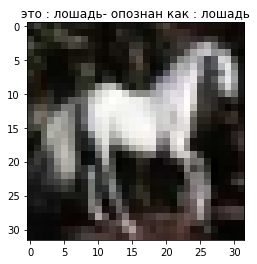

In [12]:
N = 13
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [24]:
def alexnet_model2(img_shape=(32, 32, 3), n_classes=10, l2_reg=0. ,weights=None, k_conv = 0, d_dense = 0):
    # Initialize model
    model2 = Sequential()
    k_conv = k_conv
    d_dense = d_dense
    
    # Layer 1
    model2.add(Conv2D(128 -k_conv, (11, 11), input_shape=img_shape,
    padding='same', kernel_regularizer=l2(l2_reg)))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    model2.add(Conv2D(256 -k_conv, (5, 5), padding='same'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    model2.add(ZeroPadding2D((1, 1)))
    model2.add(Conv2D(512 -k_conv, (3, 3), padding='same'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    model2.add(ZeroPadding2D((1, 1)))
    model2.add(Conv2D(1024 -k_conv, (3, 3), padding='same'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))

    # Layer 5
    model2.add(ZeroPadding2D((1, 1)))
    model2.add(Conv2D(1024 -k_conv, (3, 3), padding='same'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    model2.add(Flatten())
    model2.add(Dense(2024-d_dense))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Dropout(0.5))

    # Layer 7
    model2.add(Dense(3072-d_dense))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Dropout(0.5))

    # Layer 8
    model2.add(Dense(n_classes))
    model2.add(BatchNormalization())
    model2.add(Activation('softmax'))

    if weights is not None:
        model2.load_weights(weights)

    return model2

In [45]:
koef_conv = [16,32,64]


#i = 0
#alex_model = [] #коментируем что бы случайно не стереть 
alex_model.append(model)
i+=1


In [47]:

for indx in koef_conv:
    alex_model.append(alexnet_model2(k_conv = indx))
    alex_model[i].compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    alex_model[i].summary()
    alex_model[i].fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)
    alex_model[i].save(save_dir+('\\model.'+str(i)))
    i+=1

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 32, 32, 112)       40768     
                                                                 
 batch_normalization_56 (Bat  (None, 32, 32, 112)      448       
 chNormalization)                                                
                                                                 
 activation_56 (Activation)  (None, 32, 32, 112)       0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 112)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 240)       672240    
                                                                 
 batch_normalization_57 (Bat  (None, 16, 16, 240)     

Epoch 1/5
2000/2000 [==============================] - 3985s 2s/step - loss: 1.5985 - accuracy: 0.4290 - val_loss: 1.8039 - val_accuracy: 0.3793
Epoch 2/5
2000/2000 [==============================] - 4189s 2s/step - loss: 1.2822 - accuracy: 0.5491 - val_loss: 1.2771 - val_accuracy: 0.5558
Epoch 3/5
2000/2000 [==============================] - 3591s 2s/step - loss: 1.0988 - accuracy: 0.6181 - val_loss: 1.2313 - val_accuracy: 0.5688
Epoch 4/5
2000/2000 [==============================] - 3467s 2s/step - loss: 0.9824 - accuracy: 0.6600 - val_loss: 1.0026 - val_accuracy: 0.6550
Epoch 5/5
2000/2000 [==============================] - 3518s 2s/step - loss: 0.8745 - accuracy: 0.6973 - val_loss: 1.1520 - val_accuracy: 0.6142
INFO:tensorflow:Assets written to: C:\Users\chinyaev.av\edu\git_works\neuro_net\saved_models\model.2\assets
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (C

### Итоги. С увеличением количества ядер в сверточных слоях точность не увеличивается, даже чуть уменьшается.

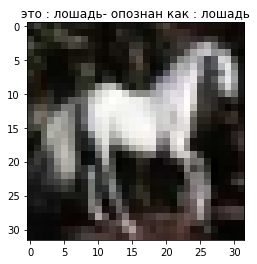

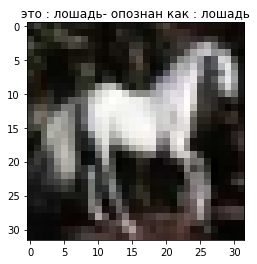

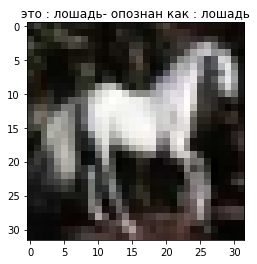

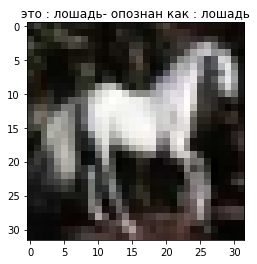

In [48]:
N = 13
for indx in alex_model:
    y_p = indx.predict(x_test[N:N+1][:,:,:])
    y_t = np.argmax(y_test[N:N+1], axis = 1 )
    y_i = np.argmax(y_p, axis = 1 )
    plt.imshow(x_test[N][:,:,:])
    plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
    plt.show()

In [ ]:
dim_dense = [128,256,512,1024]

In [ ]:
for indx in dim_dense:
    alex_model.append(alexnet_model2(d_dense = indx))
    alex_model[i].compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    alex_model[i].summary()
    alex_model[i].fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test),shuffle=True)
    alex_model[i].save(save_dir+('\\model.'+str(i)))
    i+=1

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 32, 32, 128)       46592     
                                                                 
 batch_normalization_80 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 activation_80 (Activation)  (None, 32, 32, 128)       0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 256)       819456    
                                                                 
 batch_normalization_81 (Bat  (None, 16, 16, 256)    

Epoch 1/5
2000/2000 [==============================] - 4451s 2s/step - loss: 1.6127 - accuracy: 0.4251 - val_loss: 1.8447 - val_accuracy: 0.3553
Epoch 2/5
2000/2000 [==============================] - 4447s 2s/step - loss: 1.2893 - accuracy: 0.5475 - val_loss: 1.3685 - val_accuracy: 0.5287
Epoch 3/5
  15/2000 [..............................] - ETA: 1:10:46 - loss: 1.1082 - accuracy: 0.6133

### Итоги. С увеличением количества ядер в слоях обучения точность не увеличивается.
#### Ошибкой эксперемента в том, что была выбрана начальная сеть с избыточными параметрами, уменьшение ее параметров особо не показывало разницы в точности. ####

In [17]:
save_dir

'C:\\Users\\chinyaev.av\\edu\\git_works\\neuro_net\\saved_models'